In [1]:
import os
import sys
import math
import json

cq_uav_root_path = os.path.abspath('../')
if cq_uav_root_path not in sys.path:
    sys.path.append(cq_uav_root_path)

import numpy as np
import cadquery as cq
import matplotlib.pyplot as plt
%matplotlib inline

from wing.airfoil import Airfoil, load_airfoils_collection

## Constants

In [2]:
reynolds = 100000

## Load airfoils from SplineCloud

In [3]:
airfoils_collection = load_airfoils_collection()

In [4]:
airfoil_data = airfoils_collection["NACA 4 digit airfoils"]["NACA2412"]
airfoil = Airfoil(airfoil_data)

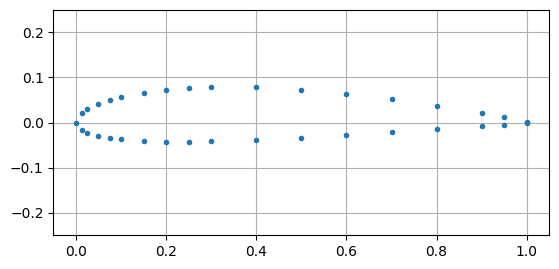

In [5]:
px, py = airfoil.profile.to_numpy().T
plt.plot(px, py, '.')
plt.grid()
ax = plt.gca()
ax.set_aspect('equal')
plt.ylim([-0.25, 0.25])
plt.show()

## Airfoil lift and drag force coefficients against angle of attack

In [6]:
alpha_vals = np.linspace(-20, 20, 161)

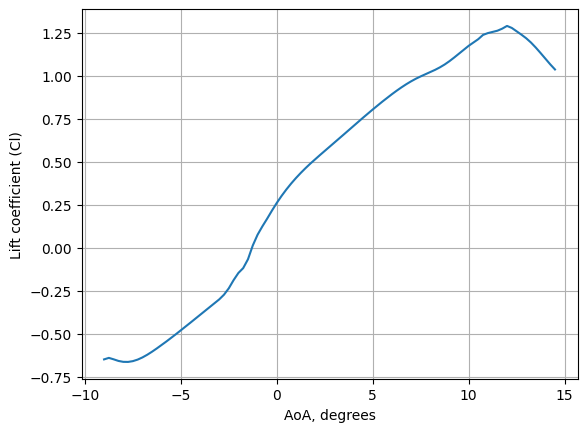

In [7]:
cl_alf_vals = [airfoil.eval_cl(alf, reynolds) for alf in alpha_vals]
plt.plot(alpha_vals, cl_alf_vals)
plt.xlabel("AoA, degrees")
plt.ylabel("Lift coefficient (Cl)")
plt.grid()
plt.show()

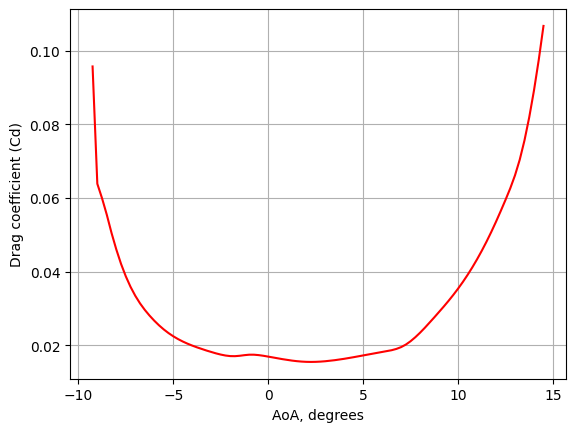

In [8]:
cd_alf_vals = [airfoil.eval_cd(alf, reynolds) for alf in alpha_vals]
plt.plot(alpha_vals, cd_alf_vals, color='red')
plt.xlabel("AoA, degrees")
plt.ylabel("Drag coefficient (Cd)")
plt.grid()
plt.show()

## Find optimal angle of attack

In [9]:
alpha_opt = airfoil.alpha_optimal(reynolds)
alpha_opt

6.657775745567242

In [10]:
cl_cd_vals = [airfoil.cl_to_cd(alf, reynolds) for alf in alpha_vals]
cl_to_cd_opt = airfoil.cl_to_cd(alpha_opt, reynolds)

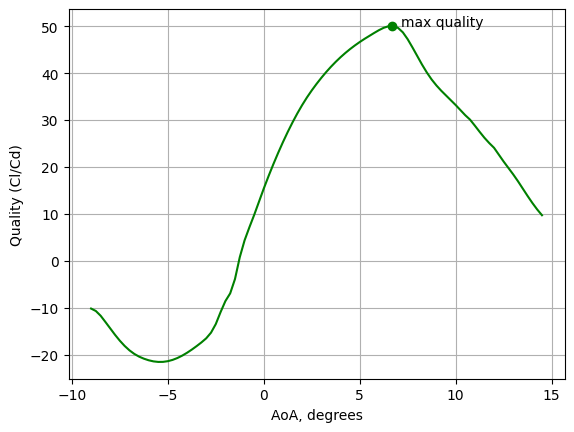

In [11]:
plt.plot(alpha_vals, cl_cd_vals, color="green")
plt.plot(alpha_opt, cl_to_cd_opt, "go")
plt.text(alpha_opt+0.5, cl_to_cd_opt, "max quality")
plt.xlabel("AoA, degrees")
plt.ylabel("Quality (Cl/Cd)")
plt.grid()
plt.show()

In [12]:
## Cl at max quality
cl_opt = airfoil.eval_cl(alpha_opt, reynolds)
cl_opt

0.9452809724858224

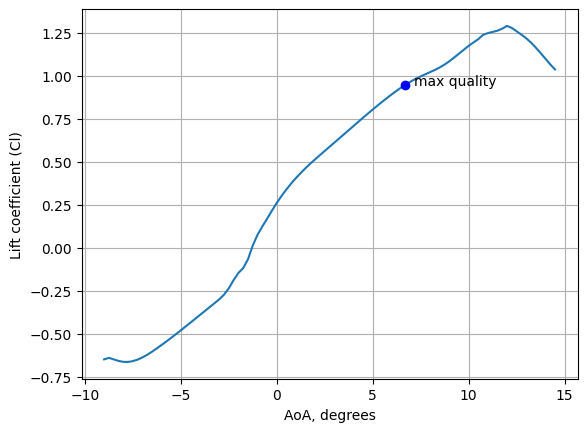

In [13]:
plt.plot(alpha_vals, cl_alf_vals)
plt.plot(alpha_opt, cl_opt, "bo")
plt.text(alpha_opt+0.5, cl_opt, "max quality")
plt.xlabel("AoA, degrees")
plt.ylabel("Lift coefficient (Cl)")
plt.grid()
plt.show()

In [14]:
## Cd at max quality
cd_opt = airfoil.eval_cd(alpha_opt, reynolds)
cd_opt

0.018883909161911544

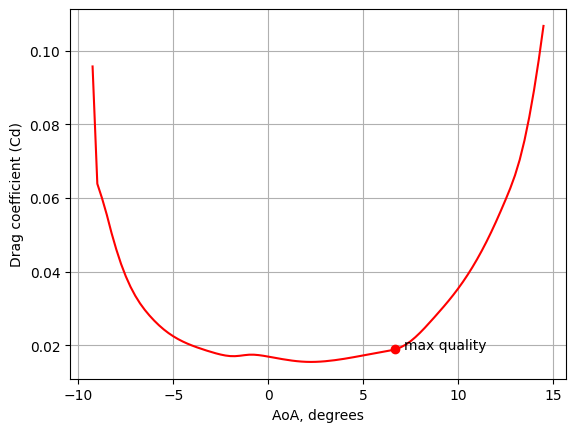

In [15]:
plt.plot(alpha_vals, cd_alf_vals, color="red")
plt.plot(alpha_opt, cd_opt, "ro")
plt.text(alpha_opt+0.5, cd_opt, "max quality")
plt.xlabel("AoA, degrees")
plt.ylabel("Drag coefficient (Cd)")
plt.grid()
plt.show()

## Find dynamic range

### Angle of attack for minimal drag coefficient

In [16]:
alpha_min_drag = airfoil.alpha_min_drag(reynolds)
alpha_min_drag

2.2509271960575123

In [17]:
## Cl at minimal Cd
cl_min_drag = airfoil.eval_cl(alpha_min_drag, reynolds)
cl_min_drag

0.5396534806249205

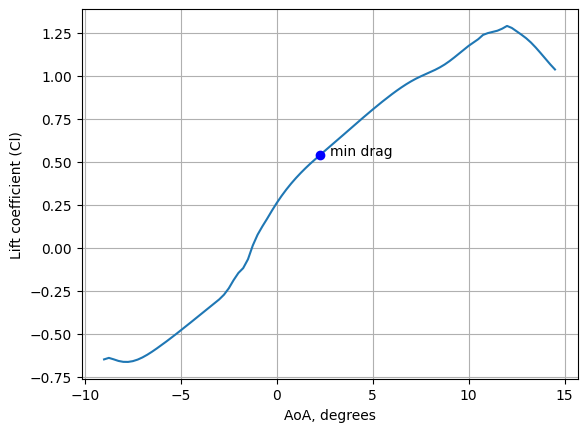

In [18]:
plt.plot(alpha_vals, cl_alf_vals)
plt.plot(alpha_min_drag, cl_min_drag, "bo")
plt.text(alpha_min_drag+0.5, cl_min_drag, "min drag")
plt.xlabel("AoA, degrees")
plt.ylabel("Lift coefficient (Cl)")
plt.grid()
plt.show()

In [19]:
## Minimal Cd
cd_min_drag = airfoil.eval_cd(alpha_min_drag, reynolds)
cd_min_drag

0.015497633455139097

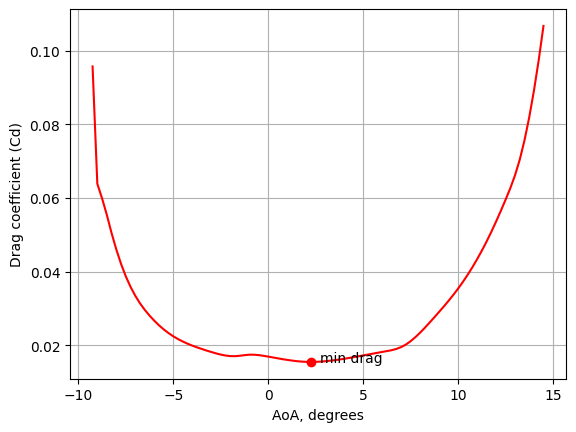

In [20]:
plt.plot(alpha_vals, cd_alf_vals, color="red")
plt.plot(alpha_min_drag, cd_min_drag, "ro")
plt.text(alpha_min_drag+0.5, cd_min_drag, "min drag")
plt.xlabel("AoA, degrees")
plt.ylabel("Drag coefficient (Cd)")
plt.grid()
plt.show()

### Angle of attack for maximal lift coefficient

In [21]:
alpha_max_lift = airfoil.alpha_max_lift(reynolds)
alpha_max_lift

12.0190858439601

In [22]:
## maximal Cl
cl_max_lift = airfoil.eval_cl(alpha_max_lift, reynolds)
cl_max_lift

1.2911811492402738

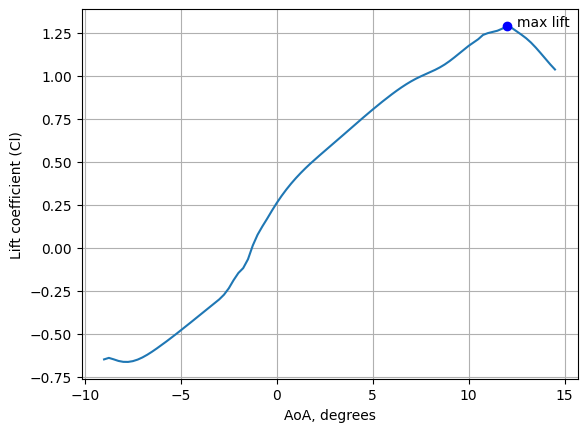

In [23]:
plt.plot(alpha_vals, cl_alf_vals)
plt.plot(alpha_max_lift, cl_max_lift, "bo")
plt.text(alpha_max_lift+0.5, cl_max_lift, "max lift")
plt.xlabel("AoA, degrees")
plt.ylabel("Lift coefficient (Cl)")
plt.grid()
plt.show()

In [24]:
## Cd at max quality
cd_max_lift = airfoil.eval_cd(alpha_max_lift, reynolds)
cd_max_lift

0.05380033559148439

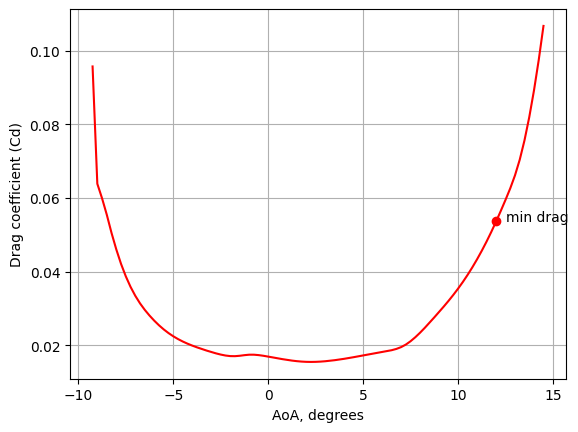

In [25]:
plt.plot(alpha_vals, cd_alf_vals, color="red")
plt.plot(alpha_max_lift, cd_max_lift, "ro")
plt.text(alpha_max_lift+0.5, cd_max_lift, "min drag")
plt.xlabel("AoA, degrees")
plt.ylabel("Drag coefficient (Cd)")
plt.grid()
plt.show()

### Airfoil dynamic range

In [26]:
dyn_range_ratio = math.sqrt(cl_max_lift / cl_min_drag)
dyn_range_ratio

1.5468068875006034

In [27]:
velocity_max = 100 #[km/h]

In [28]:
velocity_min = velocity_max / dyn_range_ratio
velocity_min

64.6493113058116

In [29]:
velocity_range = velocity_max - velocity_min
velocity_range

35.350688694188406